In [1]:
suppressPackageStartupMessages({
  library(future)
  library(Seurat)
  library(tidyverse)
  library(Seurat)
  library(ggplot2)
  library(ggrastr)   # for geom_point_rast()
  library(ggrepel)   # for geom_text_repel()
  library(dplyr)
  library(forcats)
  library(pals)      # for glasbey palette (distinct, color-blind-friendly)
  library(stringr)  
  library(RColorBrewer) # For generating high-quality color palettes
  library(cowplot)      # For the 'theme_cowplot' (a clean, minimal theme)
})

Warning message:
“package ‘future’ was built under R version 4.4.3”
Warning message:
“package ‘Seurat’ was built under R version 4.4.3”
Warning message:
“package ‘SeuratObject’ was built under R version 4.4.3”
Warning message:
“package ‘sp’ was built under R version 4.4.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.4.3”
Warning message:
“package ‘tibble’ was built under R version 4.4.3”
Warning message:
“package ‘tidyr’ was built under R version 4.4.3”
Warning message:
“package ‘readr’ was built under R version 4.4.3”
Warning message:
“package ‘dplyr’ was built under R version 4.4.3”
Warning message:
“package ‘forcats’ was built under R version 4.4.3”
Warning message:
“package ‘lubridate’ was built under R version 4.4.3”
Warning message:
“package ‘ggrastr’ was built under R version 4.4.3”
Warning message:
“package ‘ggrepel’ was built under R version 4.4.3”
Warning message:
“package ‘pals’ was built under R version 4.4.3”
Warning message:
“package ‘RColorBrewer’ w

In [2]:
myeloid_clean <- readRDS('/mnt/18T/chibao/gliomas/data/upstream/scRNA/official/integrated_v5_optimized/adult/subclusters/myeloid/myeloid_clean.rds')
myeloid_clean

An object of class Seurat 
69212 features across 94270 samples within 2 assays 
Active assay: SCT (30606 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 3 dimensional reductions calculated: pca, harmony, umap.harmony

In [3]:
myeloid_clean@meta.data <- myeloid_clean@meta.data %>%
    mutate(general_cell_type = case_when(
        SCT_snn_res.0.08 %in% c(0) ~ "MERT_Homeostatic_TAM",
        SCT_snn_res.0.08 %in% c(1) ~ "C1Q_MHCII_TAM",
        SCT_snn_res.0.08 %in% c(2) ~ "Hypoxic_TAM",
        SCT_snn_res.0.08 %in% c(3) ~ "IFN_TAM",
        SCT_snn_res.0.08 %in% c(4) ~ "Inflammatory_TAM",
        SCT_snn_res.0.08 %in% c(5) ~ "Neutrophil",
        SCT_snn_res.0.08 %in% c(6) ~ "SPP1_TAM",
        SCT_snn_res.0.08 %in% c(7) ~ "Monocyte",        
        SCT_snn_res.0.08 %in% c(11) ~ "HSP_stress_TAM",
        TRUE ~ NA_character_
    ))

head(myeloid_clean@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,project_id,orig_sample_id,sample_uid,genome,chemistry,percent.mt,doublet_class,⋯,SCT_snn_res.0.2,SCT_snn_res.0.4,SCT_snn_res.0.5,SCT_snn_res.0.6,SCT_snn_res.0.7,SCT_snn_res.0.8,SCT_snn_res.1,SCT_snn_res.1.2,seurat_clusters,general_cell_type
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AACCATGCATATACCG-1,PRJNA1125010,1175,713,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,10.9787234,singlet,⋯,0,0,0,0,0,0,0,0,0,C1Q_MHCII_TAM
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_AATTTCCCAGTATTCG-1,PRJNA1125010,4284,2090,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,1.9607843,singlet,⋯,4,6,6,6,6,7,3,4,4,MERT_Homeostatic_TAM
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACCCAAATCCACGTCT-1,PRJNA1125010,44655,6053,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,3.7509797,singlet,⋯,1,4,18,18,17,19,20,28,28,C1Q_MHCII_TAM
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGATCATCTACGGTA-1,PRJNA1125010,29414,6000,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,1.6114775,singlet,⋯,4,6,6,6,6,7,3,4,4,MERT_Homeostatic_TAM
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACGGAAGTCTTCACGC-1,PRJNA1125010,3246,1661,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,0.8934073,singlet,⋯,15,14,15,15,15,15,12,14,14,Hypoxic_TAM
PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099_ACTGTCCCACTCAAGT-1,PRJNA1125010,10869,3658,PRJNA1125010,PRJNA1125010__filtered_feature_bc_matrix,PRJNA1125010__PRJNA1125010__filtered_feature_bc_matrix__SAMN41882099,GRCh38,10x,12.9358727,singlet,⋯,2,1,2,2,1,1,1,1,1,MERT_Homeostatic_TAM


In [4]:
obj <- myeloid_clean

In [5]:
# Get all unique cell types from the specified metadata column
cell_types <- levels(factor(obj$general_cell_type))
num_cell_types <- length(cell_types)

message(paste("Found", num_cell_types, "cell types in 'general_cell_type' metadata."))

Found 9 cell types in 'general_cell_type' metadata.



In [6]:
polychrome_12 <- c(
    "#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "#F781BF", "#A65628",
    "#8DD3C7", "#BEBADA", "#FB8072", "#80B1D3", "#FDB462", "#678d8dff")

In [7]:
# Create the final color vector
if (num_cell_types > length(polychrome_12)) {
    # If there are more cell types than predefined colors, warn the user
    # and generate the remaining colors. Manual curation is best here.
    warning(paste("Number of cell types (", num_cell_types, ") exceeds the 25 predefined colors.
                   Generating extra colors via colorRampPalette.
                   For true publication quality, manual curation of this palette is recommended."))
    color_ramp <- colorRampPalette(polychrome_12)
    custom_colors <- color_ramp(num_cell_types)
} else {
    # Otherwise, just take the first N colors from the palette
    custom_colors <- polychrome_12[1:num_cell_types]
}

In [8]:
# Create the named vector to map colors to cell types explicitly
# This ensures consistency in plotting
names(custom_colors) <- cell_types

message("Custom color palette defined and mapped to cell types.")

Custom color palette defined and mapped to cell types.



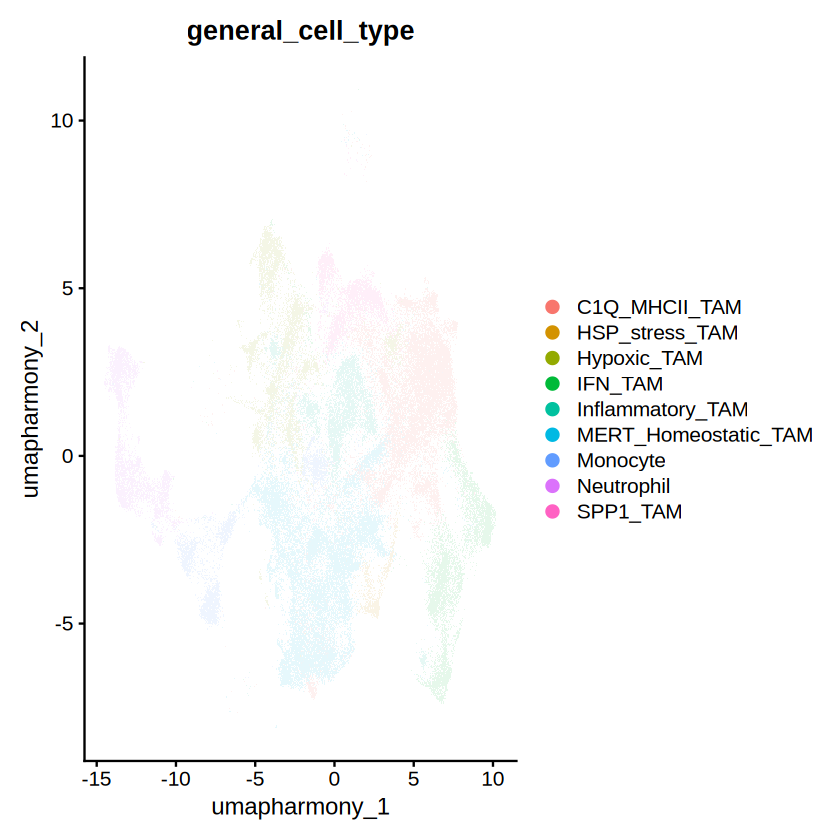

In [47]:
# Generate the base DimPlot
# We use Seurat's built-in rasterization, which is efficient
p_base <- DimPlot(
    obj,
    reduction = "umap.harmony",   # Requirement: Use 'umap.harmony'
    group.by = "general_cell_type", # Requirement: Group by cell type
    
    # Data Representation Requirements
    label = FALSE,                # Requirement: No text labels on plot
    pt.size = 0.1,                # Requirement: Small point size for X cells
    
    # Rasterization Requirement
    raster = TRUE,                # Requirement: Rasterize point layer
    raster.dpi = c(600, 600)    # High DPI for crisp points
)

p_base

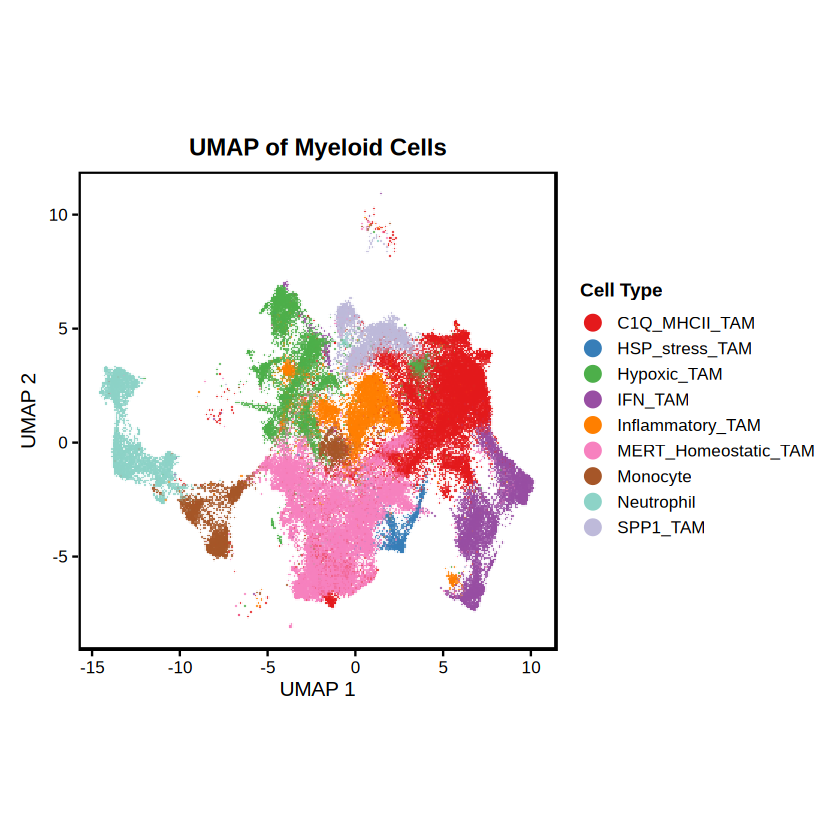

In [61]:
library(ggplot2)
library(cowplot)

# --- Key Adjustments for 95k Cells ---
# 1. pt.size: Needs to be very small (0.01 - 0.1) to see local density.
# 2. shuffle: CRITICAL. Randomizes plotting order so big clusters don't hide small ones.
# 3. raster.dpi: Bump to 300+ for print standards.
# 4. alpha: Slight transparency helps visualize density overlap.

p_base <- DimPlot(
    obj,
    reduction = "umap.harmony",
    group.by = "general_cell_type",
    
    label = FALSE,
    repel = TRUE,
    
    # --- The "High Cell Count" Tweaks ---
    pt.size = 1.08,         # 1.5 is too big for 95k cells. Start with 0.1.
    shuffle = FALSE,        # Randomizes cell order so rare cells aren't buried
    alpha = 0.8,           # Slight transparency makes the cloud look softer
    
    # --- Rasterization ---
    raster = TRUE,
    raster.dpi = c(320, 320) # Standard for high-quality print (up from 250)
)

p_formatted <- p_base +
    scale_color_manual(values = custom_colors) +
    labs(
        x = "UMAP 1", 
        y = "UMAP 2",
        title = "UMAP of Myeloid Cells", # Concise titles are better for papers
        color = "Cell Type" 
    ) +
    theme_cowplot() +
    theme(
        # Text sizes (Standardized for 1-column figures)
        axis.text = element_text(size = 10, color = "black"),
        axis.title = element_text(size = 12, color = "black"),
        legend.text = element_text(size = 10, color = "black"),
        plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
        legend.title = element_text(size = 11, face = "bold", color = "black"),
        
        # Grid and Border
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_rect(color = "black", fill = NA, linewidth = 1), # 'linewidth' replaces 'size' in new ggplot2
        axis.line = element_blank(), # Remove axis lines if using panel.border to avoid double lines
        
        # Aspect Ratio
        aspect.ratio = 1 # Forces a square plot (crucial for UMAP geometry)
    ) +
    guides(color = guide_legend(
        override.aes = list(size = 4, alpha = 1), # Make legend dots solid and big
        ncol = 1
    ))

p_formatted

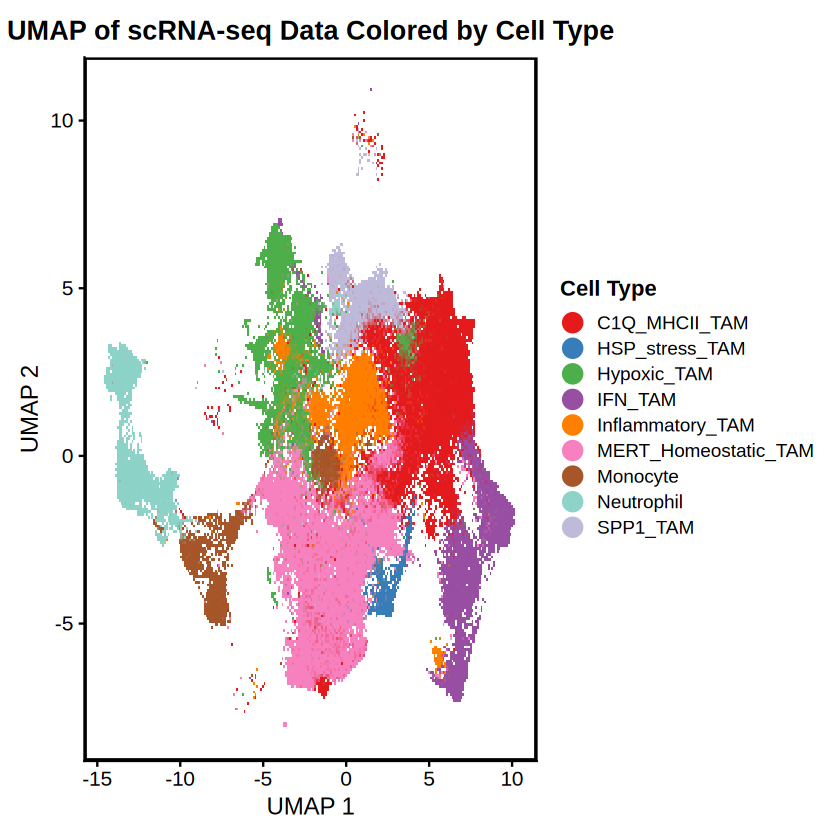

In [45]:
p_formatted <- p_base +
    # Apply the custom, named color palette
    scale_color_manual(values = custom_colors) +

    # Set correct axis and legend titles
    labs(
        x = "UMAP 1",
        y = "UMAP 2",
        title = "UMAP of scRNA-seq Data Colored by Cell Type",
        color = "Cell Type" # Renames the legend title
    ) +

    # Apply a minimal, publication-ready theme
    theme_cowplot() +
    
    # Theme adjustments for a clean, final look
    theme(
        # Set text sizes
        axis.text = element_text(size = 12, color = "black"),
        axis.title = element_text(size = 14, color = "black"),
        legend.text = element_text(size = 11, color = "black"),
        plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
        legend.title = element_text(size = 13, face = "bold", color = "black"),
        
        # Requirement: Remove all background gridlines
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        
        # Requirement: Add a clean panel border
        panel.border = element_rect(color = "black", fill = NA, size = 1),
        
        # Ensure plot axis lines are visible
        axis.line = element_line(color = "black")
    ) +
    
    # Requirement: Increase legend point size for clarity
    guides(color = guide_legend(
        override.aes = list(size = 5),
        ncol = 1 # Ensure legend is a single vertical column
    ))

p_formatted